# Processamento Digital de Imagens  

**Aluno:** *Brenda Mendes Araujo*  
**Matricula:** *202209150008*  
**Disciplina:** Computação Gráfica

---

## Questões

### **1. Como o olho humano percebe as cores e a função dos cones**
O olho humano possui dois tipos principais de fotorreceptores: **bastonetes** e **cones**.  
Os bastonetes são responsáveis pela percepção de luz e sombra, permitindo a visão noturna, enquanto os cones são responsáveis pela **visão colorida**.  

Existem três tipos de cones:  
- **L (Longo):** sensíveis à luz vermelha.  
- **M (Médio):** sensíveis à luz verde.  
- **S (Curto):** sensíveis à luz azul.  

A combinação da resposta desses três tipos de cones gera a percepção de milhões de cores diferentes, processo conhecido como **visão tricromática**.

---

### **2. Diferença entre os modelos RGB e CMYK**
- **RGB (Red, Green, Blue):** modelo **aditivo**. Utilizado em telas, monitores e câmeras. As cores são formadas pela soma das luzes vermelha, verde e azul.  
  **Exemplo:** monitores de computador, celulares e televisões.  

- **CMYK (Cyan, Magenta, Yellow, Black):** modelo **subtrativo**. Utilizado em impressão. As cores são formadas pela subtração da luz refletida no papel.  
  **Exemplo:** impressoras e gráficas.  

---

### **3. Cor aditiva e subtrativa (exemplos práticos)**
- **Cor aditiva:** parte do preto e adiciona luz até formar cores (modelo RGB).  
  **Exemplo:** telas de dispositivos eletrônicos.  

- **Cor subtrativa:** parte do branco e remove luz com pigmentos (modelo CMYK).  
  **Exemplo:** mistura de tintas coloridas na pintura ou impressão.

---

## Aplicação Prática — Sensoriamento Remoto e Espaços de Cor

O **sensoriamento remoto** utiliza imagens de satélite para analisar fenômenos naturais e urbanos.  
Os **espaços de cor** são representações matemáticas que ajudam a realçar elementos específicos das imagens, como vegetação, corpos d’água ou áreas urbanizadas.

Dois espaços muito usados são:  
- **HSV (Hue, Saturation, Value):** separa a cor (matiz), saturação e brilho. É útil para destacar regiões específicas como água e solo.  
- **Lab:** separa a luminosidade (L*) das componentes de cor (a*, b*), facilitando a distinção entre áreas esverdeadas (vegetação) e outras superfícies.

---

##  Etapas da Aplicação

1. **Carregar imagem de satélite do Rio de Janeiro**  
   Utiliza-se uma imagem da Baía de Guanabara obtida de uma fonte pública ou de tiles geográficos (Esri WorldImagery).

2. **Converter a imagem para diferentes espaços de cor**  
   - **RGB:** visualização natural.  
   - **HSV:** destaca tonalidades, facilitando a análise de cores específicas.  
   - **Lab:** enfatiza contrastes e variações de matiz, permitindo segmentação de vegetação e água.

3. **Visualizar e interpretar os resultados**  
   As imagens geradas mostram como cada espaço de cor representa a informação visual.  
   - No **HSV**, o canal *Hue* permite diferenciar tons de cor, sendo útil para separar regiões aquáticas (azuis) das demais.  
   - No **Lab**, o canal *a*** diferencia tons esverdeados (vegetação) de tons avermelhados (solo ou áreas urbanas).  

---

Código 1 – Carregamento e conversão da imagem de satélite (RJ)

In [18]:
from google.colab import files
uploaded = files.upload()

!pip -q install rasterio opencv-python-headless matplotlib numpy scikit-image

import rasterio
from rasterio.plot import reshape_as_image
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1) Caminho do arquivo
tif_path = "sample.tif"

# 2) Abrir imagem GeoTIFF
dataset = rasterio.open(tif_path)
print("Metadata:", dataset.meta)

# 3) Ler as bandas
b1 = dataset.read(1)  # Azul
b2 = dataset.read(2)  # Verde
b3 = dataset.read(3)  # Vermelho

# 4) Combinar em RGB (R=3, G=2, B=1)
# Stack in R, G, B order for natural color display and correct cv2 conversion
rgb_raw = np.dstack([b3, b2, b1]).astype(np.float32)

# Normalizar para [0, 255]
rgb_normalizado = (rgb_raw - rgb_raw.min()) / (rgb_raw.max() - rgb_raw.min())
rgb_uint8 = (rgb_normalizado * 255).astype(np.uint8)

# Assign the normalized RGB image to rgb_final for plotting
rgb_final = rgb_uint8

# 5) Converter para HSV e Lab
# Since rgb_uint8 is now in RGB format, these conversions are correct
img_hsv = cv2.cvtColor(rgb_uint8, cv2.COLOR_RGB2HSV)
img_lab = cv2.cvtColor(rgb_uint8, cv2.COLOR_RGB2LAB)

# 6) Exibir comparações
plt.figure(figsize=(15,5))
plt.subplot(1,3,1); plt.imshow(rgb_final); plt.title("RGB (GeoTIFF sample)"); plt.axis("off")
plt.subplot(1,3,2); plt.imshow(img_hsv[:,:,0], cmap="hsv"); plt.title("HSV – Hue"); plt.axis("off")
plt.subplot(1,3,3); plt.imshow(img_lab[:,:,1], cmap="gray"); plt.title("Lab – canal a*"); plt.axis("off")
plt.tight_layout(); plt.show()

KeyboardInterrupt: 

In [4]:
list(uploaded.keys())


['sample.tif']

Metadata: {'driver': 'GTiff', 'dtype': 'uint16', 'nodata': None, 'width': 1001, 'height': 1001, 'count': 3, 'crs': CRS.from_wkt('PROJCS["WGS 84 / UTM zone 31N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",3],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32631"]]'), 'transform': Affine(10.0, 0.0, 590520.0,
       0.0, -10.0, 5790630.0)}


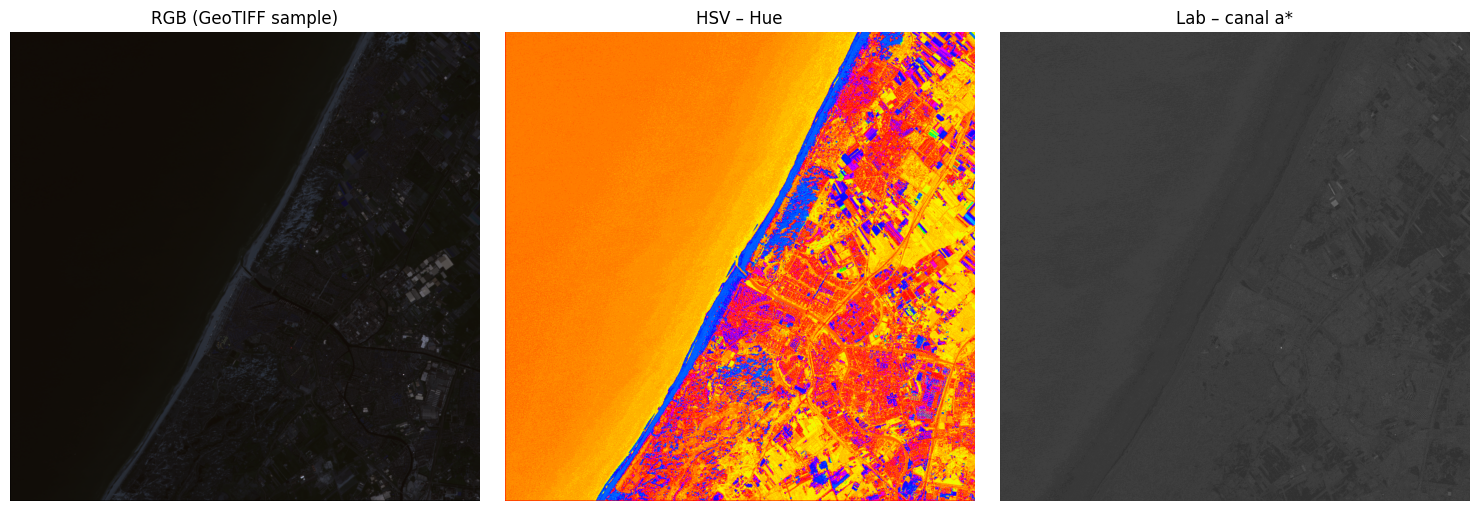

In [19]:
import rasterio
from rasterio.plot import reshape_as_image
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1) Caminho do arquivo
tif_path = "sample.tif"

# 2) Abrir imagem GeoTIFF
dataset = rasterio.open(tif_path)
print("Metadata:", dataset.meta)

# 3) Ler as bandas
b1 = dataset.read(1)  # Azul
b2 = dataset.read(2)  # Verde
b3 = dataset.read(3)  # Vermelho

# 4) Combinar em RGB (R=3, G=2, B=1)
rgb = np.dstack([b1, b2, b3]).astype(np.float32)

# Normalizar para [0, 255]
rgb_normalizado = (rgb - rgb.min()) / (rgb.max() - rgb.min())
rgb_uint8 = (rgb_normalizado * 255).astype(np.uint8)

# 5) Converter para HSV e Lab
img_hsv = cv2.cvtColor(rgb_uint8, cv2.COLOR_RGB2HSV)
img_lab = cv2.cvtColor(rgb_uint8, cv2.COLOR_RGB2LAB)

# 6) Exibir comparações
plt.figure(figsize=(15,5))
plt.subplot(1,3,1); plt.imshow(rgb_uint8); plt.title("RGB (GeoTIFF sample)"); plt.axis("off")
plt.subplot(1,3,2); plt.imshow(img_hsv[:,:,0], cmap="hsv"); plt.title("HSV – Hue"); plt.axis("off")
plt.subplot(1,3,3); plt.imshow(img_lab[:,:,1], cmap="gray"); plt.title("Lab – canal a*"); plt.axis("off")
plt.tight_layout(); plt.show()


Código 2 – Detecção de água e vegetação

Pixels água: 16612
Pixels vegetação: 1001857


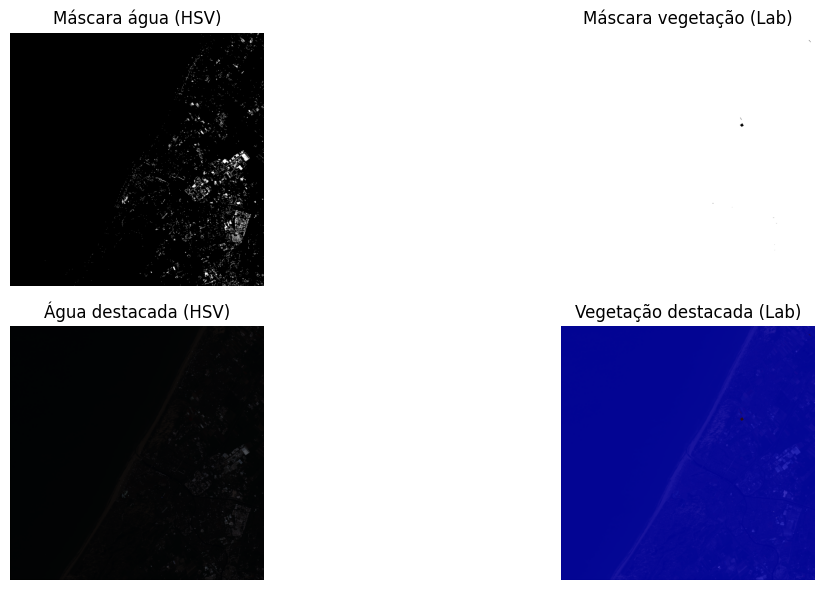

In [8]:
# ==============================
# Código 2 — Segmentação
# Usa as variáveis do Código 1: rgb_uint8, img_hsv, img_lab
# ==============================

import numpy as np
import matplotlib.pyplot as plt

# 1) Máscaras (ajuste fino se precisar)
h, s, v = img_hsv[:,:,0], img_hsv[:,:,1], img_hsv[:,:,2]
mask_agua = (h >= 70) & (h <= 160) & (s > 20) & (v > 30)

a = img_lab[:,:,1]
mask_veg = a < 145

# 2) Funções utilitárias
def aplica_mascara(rgb, mask):
    out = rgb.copy()
    out[~mask] = (out[~mask] * 0.25).astype(np.uint8)  # escurece onde não é máscara
    return out

def overlay(rgb, mask, alpha=0.45):
    """Sobrepõe a máscara em vermelho (vegetação) ou azul (água) para visual mais forte."""
    color = np.zeros_like(rgb, dtype=np.uint8)
    color[...,2] = 255  # vermelho por padrão
    out = rgb.copy()
    out[mask] = (alpha*color[mask] + (1-alpha)*rgb[mask]).astype(np.uint8)
    return out

# 3) Checagem rápida (quantos pixels foram pegos)
print("Pixels água:", int(mask_agua.sum()))
print("Pixels vegetação:", int(mask_veg.sum()))

# 4) Visualizações
plt.figure(figsize=(14,6))
plt.subplot(2,2,1); plt.imshow(mask_agua, cmap="gray"); plt.title("Máscara água (HSV)"); plt.axis("off")
plt.subplot(2,2,2); plt.imshow(mask_veg,  cmap="gray"); plt.title("Máscara vegetação (Lab)"); plt.axis("off")

plt.subplot(2,2,3); plt.imshow(aplica_mascara(rgb_uint8, mask_agua)); plt.title("Água destacada (HSV)"); plt.axis("off")

# Overlay vermelho para vegetação (mude a cor se quiser)
overlay_veg = overlay(rgb_uint8, mask_veg, alpha=0.55)
plt.subplot(2,2,4); plt.imshow(overlay_veg); plt.title("Vegetação destacada (Lab)"); plt.axis("off")
plt.tight_layout(); plt.show()


## Conclusão

Os diferentes espaços de cores permitem realçar propriedades específicas de uma imagem de satélite:  

- **RGB** fornece uma visão natural semelhante à humana.  
- **HSV** destaca facilmente tons específicos como **água (azul)**.  
- **Lab** facilita separar áreas esverdeadas, indicando **vegetação**.  

Essas transformações são essenciais em análises ambientais e urbanas por exemplo, para **monitorar desmatamento**, **expansão urbana** ou **mudanças em áreas costeiras** do Rio de Janeiro.